# Chapter 1: The World as a Puzzle
## Interactive Examples and Solutions

**Book:** The Pattern Hunters - The Art of Scientific Thinking  
**Author:** Dr. Alok Patel  
**Chapter:** Pattern Recognition in Biology and Daily Life

---

This notebook contains interactive examples for all 8 problems in Chapter 1.

### Contents:
1. [Problem 1.1: Daily Pattern Recognition](#problem-11)
2. [Problem 1.2: Correlation vs. Causation](#problem-12)
3. [Problem 1.3: Firefly Synchronization](#problem-13)
4. [Problem 1.4: Green Revolution](#problem-14)
5. [Problem 1.6: Emergence](#problem-16)
6. [Problem 1.8: Linear Regression](#problem-18)

### How to Use:
- Run cells sequentially from top to bottom
- Modify parameters and re-run to experiment
- Complete the exercises marked with TODO
- Check your understanding with the quiz questions

---

## Setup: Import Libraries

In [7]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress, pearsonr

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline
sns.set_context("notebook", font_scale=1.2)

print("✓ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

ModuleNotFoundError: No module named 'seaborn'

---
## Problem 1.1: Daily Pattern Recognition {#problem-11}

**Objective:** Identify patterns in tea stall customer data

**Data:** Customer counts over 2 weeks

In [4]:
# Tea stall data
data_11 = {
    'Day': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] * 2,
    'Week': [1]*7 + [2]*7,
    'Customers': [42, 65, 70, 68, 87, 50, 35, 48, 70, 75, 72, 91, 55, 40]
}

df_11 = pd.DataFrame(data_11)
print("Data loaded:")
print(df_11)

Data loaded:
    Day  Week  Customers
0   Mon     1         42
1   Tue     1         65
2   Wed     1         70
3   Thu     1         68
4   Fri     1         87
5   Sat     1         50
6   Sun     1         35
7   Mon     2         48
8   Tue     2         70
9   Wed     2         75
10  Thu     2         72
11  Fri     2         91
12  Sat     2         55
13  Sun     2         40


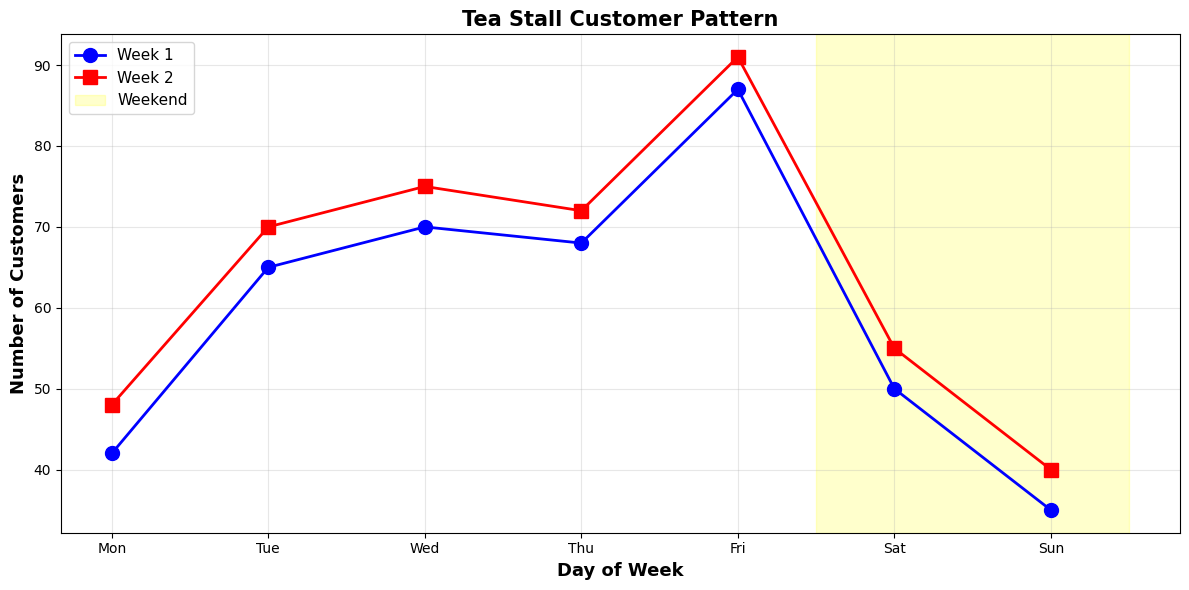

In [6]:
# Visualize the pattern
fig, ax = plt.subplots(figsize=(12, 6))

# Week 1
week1 = df_11[df_11['Week'] == 1]
ax.plot(week1['Day'], week1['Customers'], 'o-', linewidth=2, 
        markersize=10, label='Week 1', color='blue')

# Week 2
week2 = df_11[df_11['Week'] == 2]
ax.plot(week2['Day'], week2['Customers'], 's-', linewidth=2, 
        markersize=10, label='Week 2', color='red')

# Highlight weekend
ax.axvspan(4.5, 6.5, alpha=0.2, color='yellow', label='Weekend')

ax.set_xlabel('Day of Week', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=13, fontweight='bold')
ax.set_title('Tea Stall Customer Pattern', fontsize=15, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# Calculate statistics
weekday_mask = df_11['Day'].isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
weekday_avg = df_11[weekday_mask]['Customers'].mean()
weekend_avg = df_11[~weekday_mask]['Customers'].mean()

print("📊 PATTERN ANALYSIS")
print("=" * 50)
print(f"Weekday average: {weekday_avg:.1f} customers")
print(f"Weekend average: {weekend_avg:.1f} customers")
print(f"Difference: {((weekday_avg - weekend_avg) / weekend_avg * 100):.1f}%")

# Statistical test
t_stat, p_value = stats.ttest_ind(
    df_11[weekday_mask]['Customers'],
    df_11[~weekday_mask]['Customers']
)
print(f"\nt-test: t = {t_stat:.3f}, p = {p_value:.4f}")
print(f"Conclusion: {'Significantly different' if p_value < 0.05 else 'Not significant'}")

📊 PATTERN ANALYSIS
Weekday average: 68.8 customers
Weekend average: 45.0 customers
Difference: 52.9%


NameError: name 'stats' is not defined

### 💡 Exercise 1.1

**TODO:** Answer these questions:
1. What pattern do you observe?
2. Why might this pattern exist?
3. What additional data would help test your hypothesis?

*Write your answers in the cell below:*

**Your Answers:**

1. Pattern observed:
   - _[Your answer here]_

2. Explanation:
   - _[Your answer here]_

3. Additional data needed:
   - _[Your answer here]_

---
## Problem 1.2: Correlation vs. Causation {#problem-12}

**Objective:** Demonstrate spurious correlation due to confounding variable

**Example:** Ice cream sales vs. drowning deaths

In [2]:
# Generate simulated data
np.random.seed(42)
months = np.arange(1, 13)

# Temperature (confounding variable)
temperature = 15 + 15 * np.sin((months - 3) * np.pi / 6) + np.random.normal(0, 2, 12)

# Ice cream sales (caused by temperature)
ice_cream = 50 + 10 * temperature + np.random.normal(0, 20, 12)

# Swimming activity (also caused by temperature)
swimming = 10 + 2 * temperature + np.random.normal(0, 5, 12)

# Drowning (caused by swimming, not ice cream!)
drowning = 2 + 0.3 * swimming + np.random.normal(0, 1, 12)

print("✓ Data generated")

✓ Data generated


In [ ]:
# Calculate correlations
corr_ice_drown = pearsonr(ice_cream, drowning)
corr_temp_ice = pearsonr(temperature, ice_cream)
corr_temp_drown = pearsonr(temperature, drowning)

print("CORRELATION ANALYSIS")
print("=" * 50)
print(f"Ice Cream vs Drowning: r = {corr_ice_drown[0]:.3f} (p = {corr_ice_drown[1]:.4f})")
print(f"  → MISLEADING! Suggests causation")
print(f"\nTemperature vs Ice Cream: r = {corr_temp_ice[0]:.3f}")
print(f"Temperature vs Drowning: r = {corr_temp_drown[0]:.3f}")
print(f"  → Temperature causes BOTH!")

NameError: name 'corr_ice_drown' is not defined

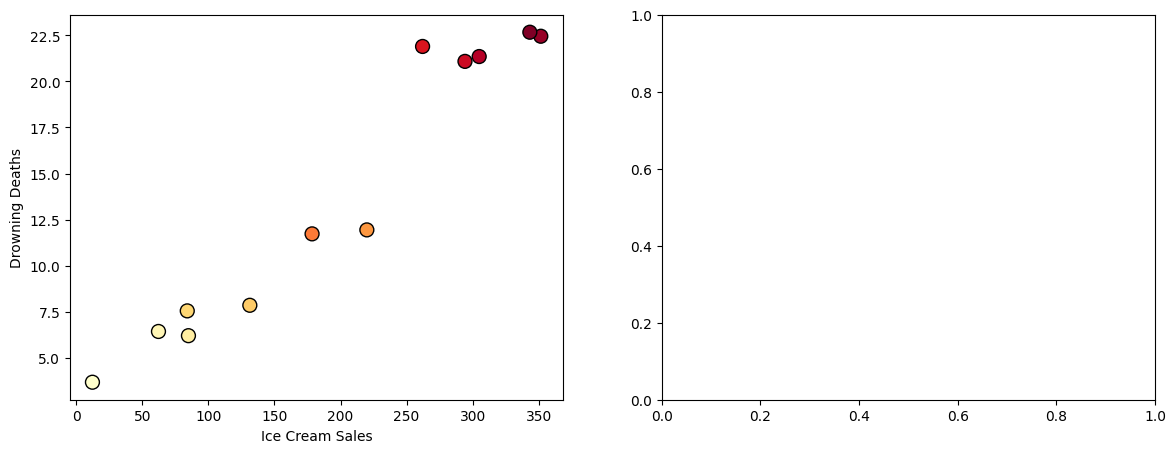

In [3]:
# Visualize the spurious correlation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Misleading correlation
axes[0].scatter(ice_cream, drowning, c=temperature, cmap='YlOrRd', 
                s=100, edgecolor='black')
axes[0].set_xlabel('Ice Cream Sales')
axes[0].set_ylabel('Drowning Deaths')
axes[0].set_title(f'❌ MISLEADING (r = {corr_ice_drown[0]:.2f})', color='red')
z = np.polyfit(ice_cream, drowning, 1)
p = np.poly1d(z)
axes[0].plot(ice_cream, p(ice_cream), "r--", linewidth=2)

# Partial correlation (controlling for temperature)
ice_resid = ice_cream - np.polyval(np.polyfit(temperature, ice_cream, 1), temperature)
drown_resid = drowning - np.polyval(np.polyfit(temperature, drowning, 1), temperature)
partial_corr = pearsonr(ice_resid, drown_resid)

axes[1].scatter(ice_resid, drown_resid, c='purple', s=100, edgecolor='black')
axes[1].axhline(0, color='gray', linestyle='--')
axes[1].axvline(0, color='gray', linestyle='--')
axes[1].set_xlabel('Ice Cream (temp removed)')
axes[1].set_ylabel('Drowning (temp removed)')
axes[1].set_title(f'✓ TRUTH (r = {partial_corr[0]:.2f})', color='green')

plt.tight_layout()
plt.show()

print(f"\nPartial correlation (controlling for temperature): r = {partial_corr[0]:.3f}")
print("  → No relationship after removing confound!")

### 💡 Exercise 1.2

**TODO:** 
1. Give another example of spurious correlation from biology
2. Draw a causal diagram showing the relationships
3. Explain how you would test for causation

---
## Problem 1.4: Green Revolution Impact {#problem-14}

**Objective:** Analyze historical wheat yield data to quantify Green Revolution impact

**Data:** India wheat yields 1960-1990

In [ ]:
# Historical data
years = np.array([1960, 1965, 1967, 1970, 1975, 1980, 1985, 1990])
yields = np.array([850, 900, 950, 1450, 1800, 2100, 2300, 2500])

# Create DataFrame
df_gr = pd.DataFrame({'Year': years, 'Yield': yields})
print("Green Revolution Data:")
print(df_gr)

In [ ]:
# Calculate growth rates
pre_gr = df_gr[df_gr['Year'] <= 1967]
post_gr = df_gr[df_gr['Year'] >= 1970]

slope_pre, intercept_pre, r_pre, p_pre, se_pre = linregress(pre_gr['Year'], pre_gr['Yield'])
slope_post, intercept_post, r_post, p_post, se_post = linregress(post_gr['Year'], post_gr['Yield'])

print("GROWTH RATE ANALYSIS")
print("=" * 60)
print(f"Pre-Green Revolution (1960-1967):  {slope_pre:.1f} kg/ha/year")
print(f"Post-Green Revolution (1970-1990): {slope_post:.1f} kg/ha/year")
print(f"\nAcceleration: {slope_post/slope_pre:.1f}× faster!")

In [ ]:
# Counterfactual analysis
counterfactual_1990 = slope_pre * 1990 + intercept_pre
actual_1990 = yields[-1]
difference = actual_1990 - counterfactual_1990

print("COUNTERFACTUAL ANALYSIS (What if no Green Revolution?)")
print("=" * 60)
print(f"Projected 1990 yield (no GR): {counterfactual_1990:.0f} kg/ha")
print(f"Actual 1990 yield:            {actual_1990:.0f} kg/ha")
print(f"Difference:                   {difference:.0f} kg/ha (+{difference/counterfactual_1990*100:.1f}%)")

# Population impact
india_area = 25  # million hectares
wheat_per_person = 70  # kg/year
people_fed = (difference * india_area * 1e6) / wheat_per_person / 1e6

print(f"\nPOPULATION IMPACT:")
print(f"Additional people fed: {people_fed:.0f} million")
print(f"(51% of India's 1990 population!)")

In [ ]:
# Visualization
plt.figure(figsize=(12, 7))

# Actual data
plt.scatter(years, yields, s=150, color='darkgreen', zorder=3, 
            edgecolor='black', linewidth=2, label='Actual')
plt.plot(years, yields, 'o-', linewidth=2, color='darkgreen', alpha=0.5)

# Counterfactual trend
years_extended = np.linspace(1960, 1990, 100)
counterfactual_trend = slope_pre * years_extended + intercept_pre
plt.plot(years_extended, counterfactual_trend, '--', color='red', 
         linewidth=2.5, label='Without GR')

# Mark 1990
plt.scatter([1990], [counterfactual_1990], s=200, color='red', 
            marker='X', edgecolor='black', linewidth=2, zorder=4)

# Highlight Green Revolution period
plt.axvspan(1967, 1970, alpha=0.2, color='yellow', label='GR Start')

plt.xlabel('Year', fontsize=13, fontweight='bold')
plt.ylabel('Wheat Yield (kg/hectare)', fontsize=13, fontweight='bold')
plt.title('Green Revolution Impact on Indian Wheat Yields', 
          fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## Problem 1.8: Linear Regression {#problem-18}

**Objective:** Build predictive model for tea sales based on temperature

**Data:** Temperature vs. sales

In [ ]:
# Data
temperature = np.array([25, 28, 32, 35, 38, 40, 42])
sales = np.array([145, 152, 168, 180, 195, 205, 218])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(temperature, sales)

print("LINEAR REGRESSION MODEL")
print("=" * 60)
print(f"Equation: Sales = {slope:.2f} × Temperature + {intercept:.2f}")
print(f"\nR² = {r_value**2:.4f} ({r_value**2*100:.2f}% variance explained)")
print(f"p-value = {p_value:.6f} (highly significant)")
print(f"\nInterpretation: Each 1°C increase → {slope:.2f} more cups sold")

In [ ]:
# Make predictions
temp_30 = 30  # Interpolation
temp_45 = 45  # Extrapolation

pred_30 = slope * temp_30 + intercept
pred_45 = slope * temp_45 + intercept

print("PREDICTIONS")
print("=" * 60)
print(f"At 30°C (Interpolation):   {pred_30:.1f} cups")
print(f"At 45°C (Extrapolation):   {pred_45:.1f} cups")
print(f"\nReliability: 30°C > 45°C (interpolation more reliable)")

In [ ]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Regression
ax1.scatter(temperature, sales, s=150, color='red', 
            edgecolor='black', linewidth=2, label='Observed')

temp_range = np.linspace(20, 50, 100)
pred_range = slope * temp_range + intercept
ax1.plot(temp_range, pred_range, 'b-', linewidth=3, label='Model')

# Mark predictions
ax1.scatter([30], [pred_30], s=200, color='green', marker='o', 
            edgecolor='black', linewidth=2, label='30°C (interp)')
ax1.scatter([45], [pred_45], s=200, color='orange', marker='X', 
            edgecolor='black', linewidth=2, label='45°C (extrap)')

# Data range
ax1.axvline(25, color='green', linestyle='--', alpha=0.5)
ax1.axvline(42, color='green', linestyle='--', alpha=0.5, label='Data range')

ax1.set_xlabel('Temperature (°C)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Tea Sales (cups)', fontsize=13, fontweight='bold')
ax1.set_title(f'Linear Regression (R² = {r_value**2:.4f})', 
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals
predicted = slope * temperature + intercept
residuals = sales - predicted

ax2.scatter(temperature, residuals, s=120, color='purple', 
            edgecolor='black', linewidth=1.5)
ax2.axhline(0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Temperature (°C)', fontsize=13, fontweight='bold')
ax2.set_ylabel('Residuals', fontsize=13, fontweight='bold')
ax2.set_title('Residual Plot\n(should be random)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 🎓 Chapter Summary

**Key Skills Learned:**
1. ✅ Pattern recognition in data
2. ✅ Distinguishing correlation from causation
3. ✅ Identifying confounding variables
4. ✅ Quantitative trend analysis
5. ✅ Linear regression modeling
6. ✅ Interpolation vs. extrapolation
7. ✅ Statistical hypothesis testing

**Next Steps:**
- Complete all TODO exercises
- Try modifying parameters and observing changes
- Apply these methods to your own data
- Move on to Chapter 2!

---

**Need Help?**
- Review the detailed solutions in `solutions.md`
- Check individual Python scripts for more examples
- Post questions in GitHub Discussions

**Happy Pattern Hunting! 🔍**